# Csoportosítás, korreláció, vizualizáció (Pandas)

---

(2020. 02. 04. – 14. óra)

Mittelholcz Iván

In [1]:
# íriszadatbázis beolvasása
import pandas as pd

df = pd.read_csv('../13.pandas/iris.tsv', sep='\t', index_col=0)

## 1. Csoportosítás

Az agregáló függvényeket (sum, min, max, mean, mode, std, stb.) nem csak a teljes táblára, vagy annak egyes oszlopaira lehet lekérni, hanem egy vagy több oszlop értékei szerint csoportosítva is.

![kép](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

forrás: [VanderPlas, Jake: Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#Split,-apply,-combine)

Pl. íriszek fajtái szerint vagyunk kíváncsiak az átlagos mértekre:

In [ ]:
# a csoportosítás nem tábla, de táblaszerű
df.groupby('species')

In [ ]:
# a csoportosítás nem tábla, de táblaszerű, van pl. oszlopszerűsége (ami nem oszlop)
df.groupby('species')['sepal_width']

In [ ]:
# viszont a tábla- ill. oszlopszerűségen is lehet aggregálni
# tábla:
df.groupby('species').mean()
# egy oszlop:
# df.groupby('species')['sepal_width'].mean()
# több oszlop:
# df.groupby('species')['sepal_length', 'sepal_width'].mean()

In [ ]:
# Mi hiányzik? Miért hiányzik?
df.groupby('species').mean()
# df.groupby('sepal_width').mean()

Csoportosítás több oszlop alapján

In [ ]:
# sepal_width és species szerint csoportosítunk, számláljuk a cellák eredményeit
df.groupby(['sepal_width', 'species'])['sepal_width'].count().head()
# Miért ugyanaz az eredmény?
# df.groupby(['sepal_width', 'species']).count().head()

## 2. Korreláció

Lineáris kapcsolat (függőség / függetlenség) két változó között. Ha nincs korreláció, attól még lehet (nem lineáris) kapcsolat (pl. négyzetes).

Normális eloszlás: a valószínűségi változók, ha korrelálatlanok, akkor függetlenek is.

Módszerek nem lineáris kapcsolatok kimutatására: kölcsönös információ, feltételes valószínűség

- $\rho$: populációbeli (elméleti) korreláció
- $r$: mintabeli (Pearson-féle) korreláció
- $-1 \leq r \leq 1$
- $r = 0$: korrelálatlanok

szintaxis (Pearson - deafult):

```py
df['oszlop1'].corr(df['oszlop2'])
```

Spearman:

```py
df['oszlop1'].corr(df['oszlop2'], method='kendall')
```

Kendall:

```py
df['oszlop1'].corr(df['oszlop2'], method='kendall')
```

In [ ]:
df['sepal_length'].corr(df['sepal_width'])

Korreláció is aggregál: lehet csoportosítással használni:

In [ ]:
df.groupby('species')['sepal_length'].corr(df['sepal_width'])

In [ ]:
# setosa
df.loc[1:50, :]['sepal_length'].corr(df.loc[1:50, :]['sepal_width'])

In [ ]:
# versicolor
df.loc[51:100, :]['sepal_length'].corr(df.loc[51:100, :]['sepal_width'])

In [ ]:
# virginica
df.loc[101:150, :]['sepal_length'].corr(df.loc[101:150, :]['sepal_width'])

## 3. Vizualizáció

Minden DataFrame-nek és oszlopának (Series) (és GroupBy-nak) van `.plot()` metódusa, ami igazából a *matplotlib* modult hívja a háttérben.

A `.plot()` alapból *line plot*-ot fog készíteni, ezt a `kind='típus'` opcionális paraméterrel tudjuk felülírni. Pl oszlopdiagram: `df.plot(kind='bar')` Lehetőségek:

- `'line'`
- `'bar'` és `'barh'`: függőleges és vízszintes oszlopdiagramm
- `'pie'`: torta
- `'hist'`: hisztogram
- `'box'`: dobozos
- `'scatter'`: pöttyös

További opcionális paraméterek: [`pandas.DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)

In [3]:
%matplotlib inline

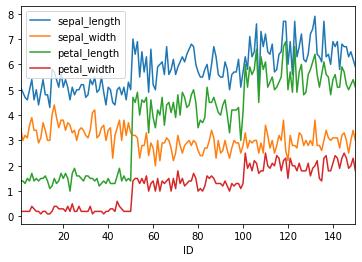

In [2]:
df.plot()

### 5.1. Egydimenziós adatok ábrázolása

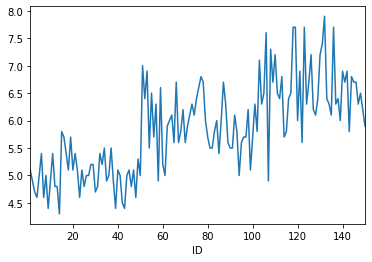

In [4]:
df['sepal_length'].plot()

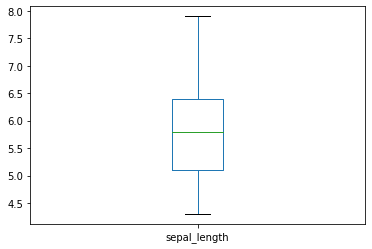

In [12]:
# boxplot (kvartilisek)
df['sepal_length'].plot(kind='box')

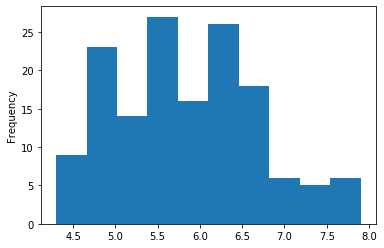

In [14]:
# hisztogram
df['sepal_length'].plot(kind='hist')

species
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: sepal_length, dtype: object

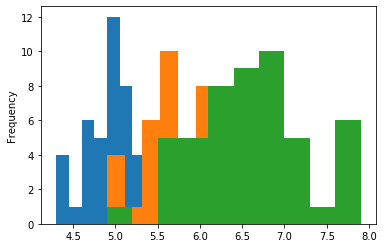

In [16]:
# hisztogram csoportokra
df.groupby('species')['sepal_length'].plot(kind='hist')

### 5.2. Kétdimenziós adatok ábrázolása

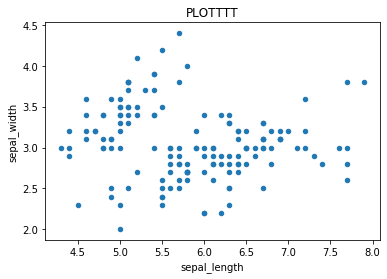

In [20]:
# két változó a két tengelyen, szórásdiagram
df.plot(x='sepal_length', y='sepal_width', kind='scatter', title='PLOTTTT')

species
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

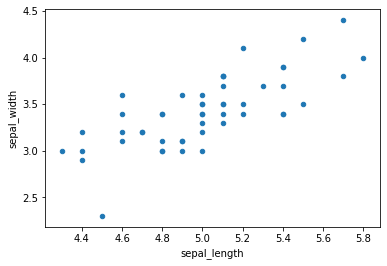

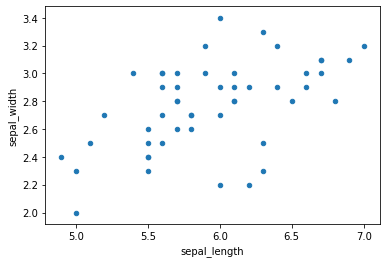

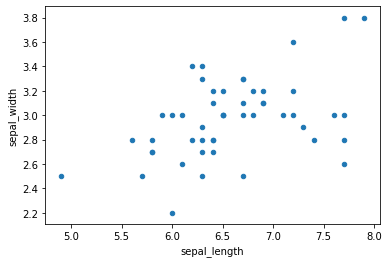

In [21]:
df.groupby('species').plot(x='sepal_length', y='sepal_width', kind='scatter')

In [23]:
df.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


### 5.3. Többdimenziós adatok ábrázolása

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffae1a74790>,
      dtype=object)

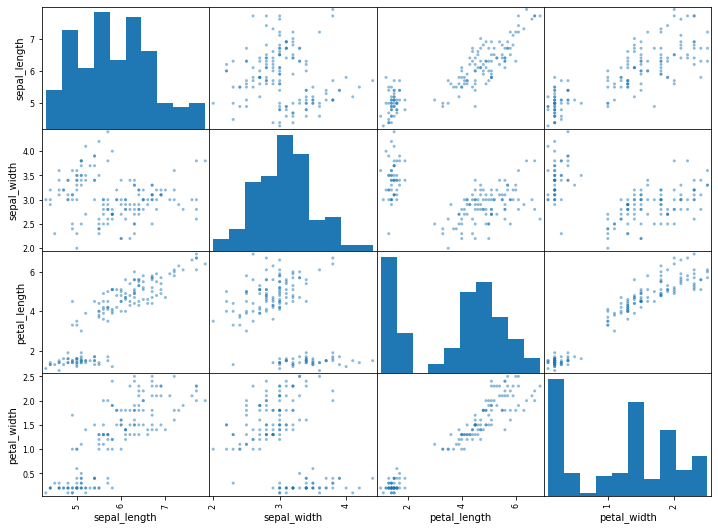

In [26]:
# szórásdiagram mátrix
pd.plotting.scatter_matrix(df, figsize=(12, 9))

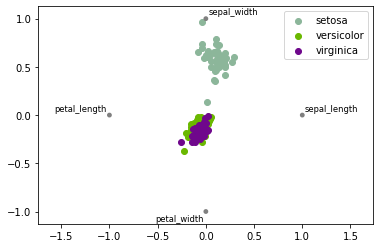

In [25]:
pd.plotting.radviz(df, 'species')

## Irodalom

- Hivatalos:
    - [Dokumentáció](https://pandas.pydata.org/pandas-docs/stable/)
    - [Getting started](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)
- [Real Python: Pandas](https://realpython.com/search?q=pandas)
- [Downey, Allen B.: Think Stats](http://www.greenteapress.com/thinkstats/)
- [VanderPlas, Jake: Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)